In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np

##### MuG Dataset
- The plot shows Accuracy in the left and Log loss in the right plot for unimodal and multimodal feature concatenation. The last plot corresponds to value from the paper (https://aclanthology.org/2023.findings-emnlp.354.pdf)
- T = Text, I = Image, Tab = Tabular

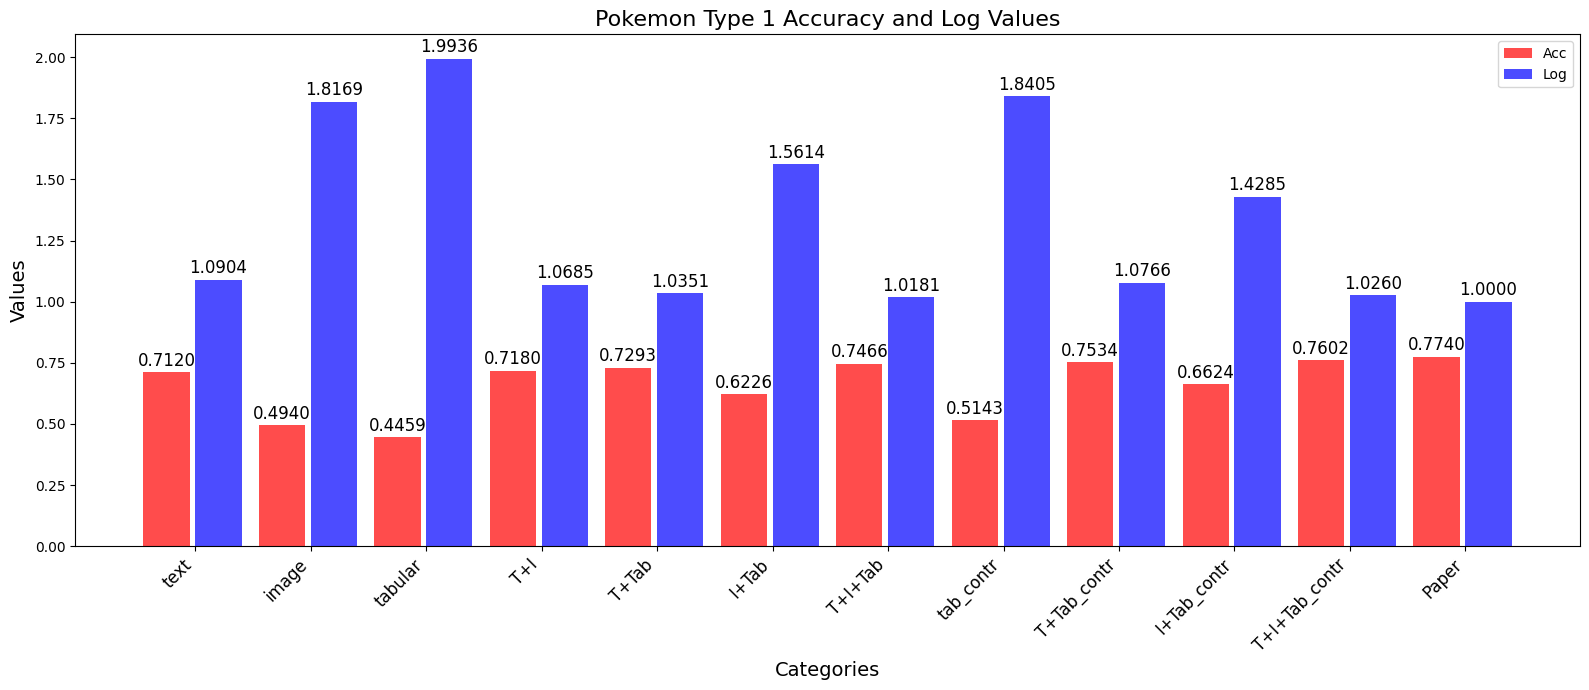

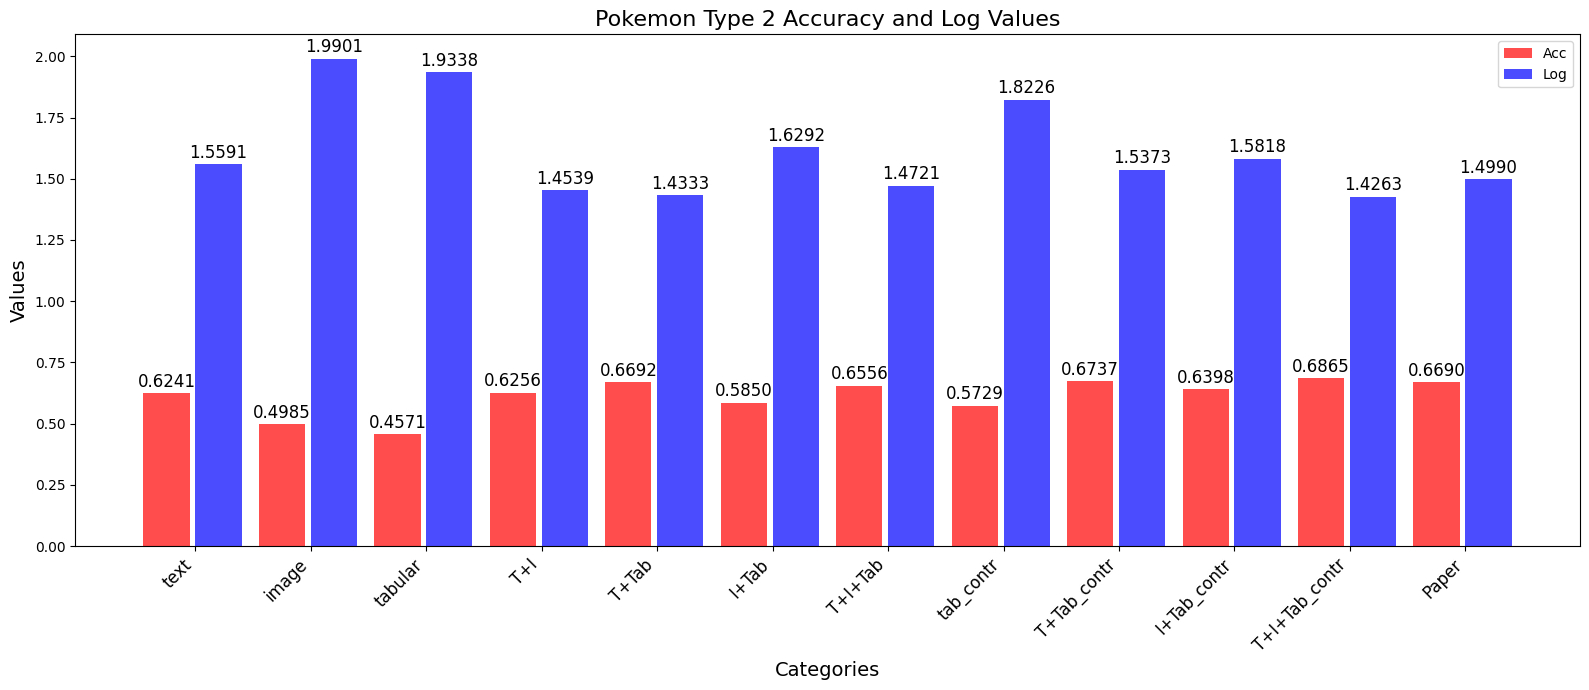

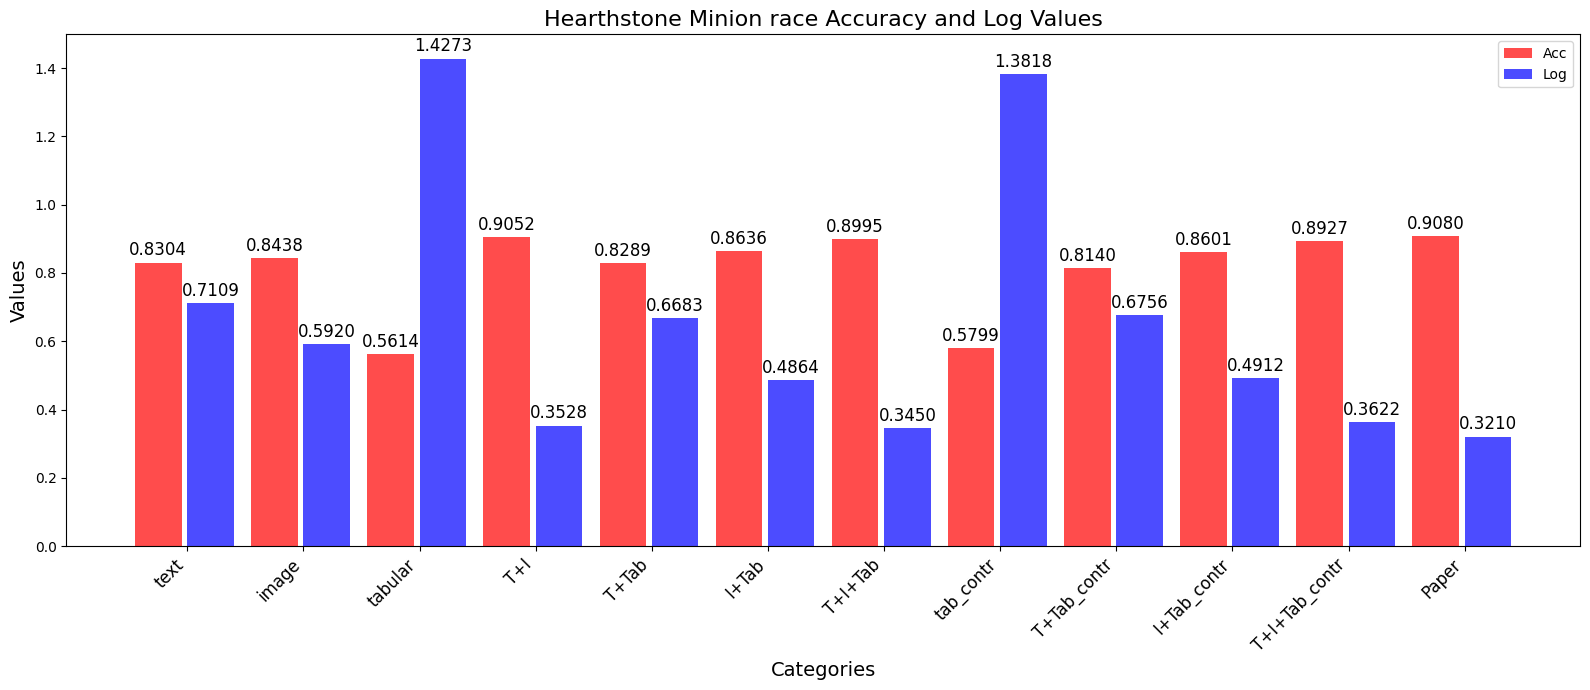

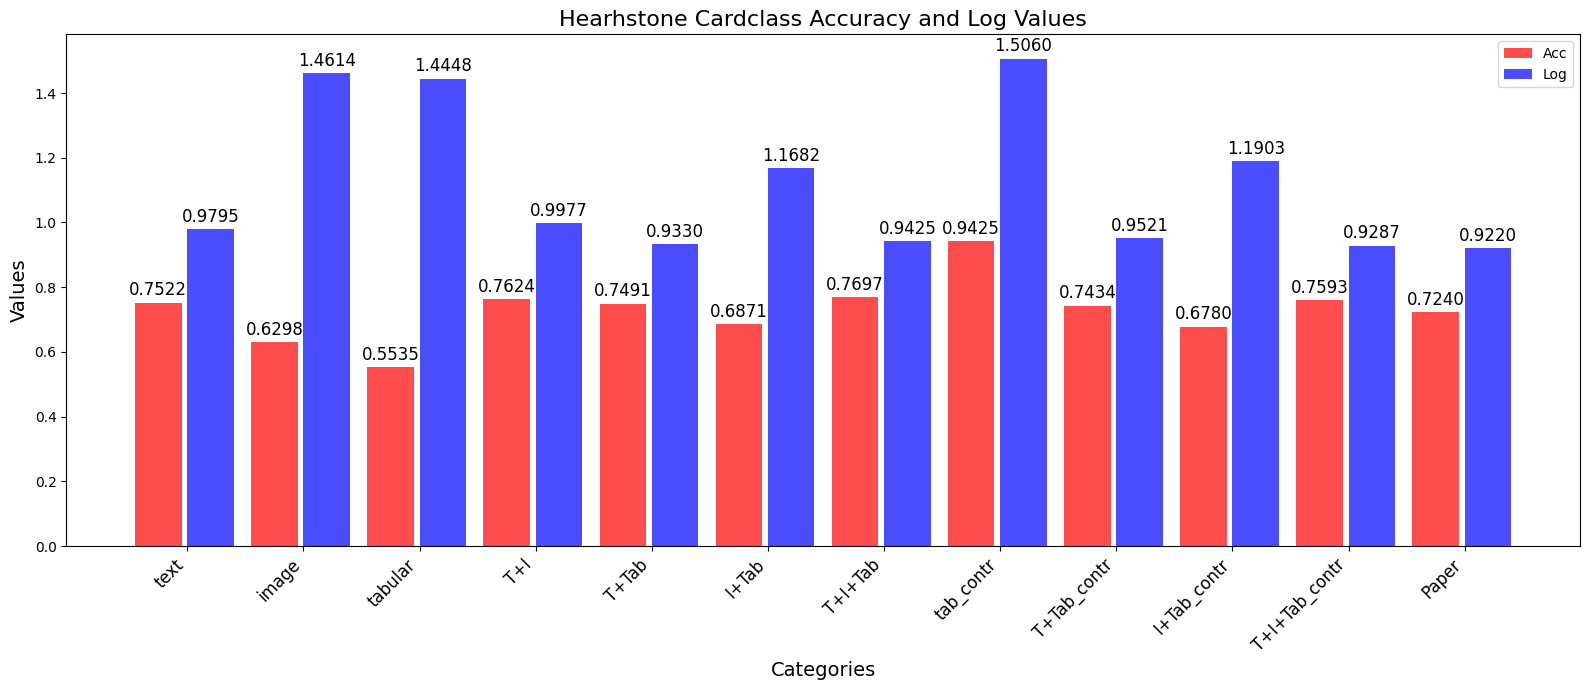

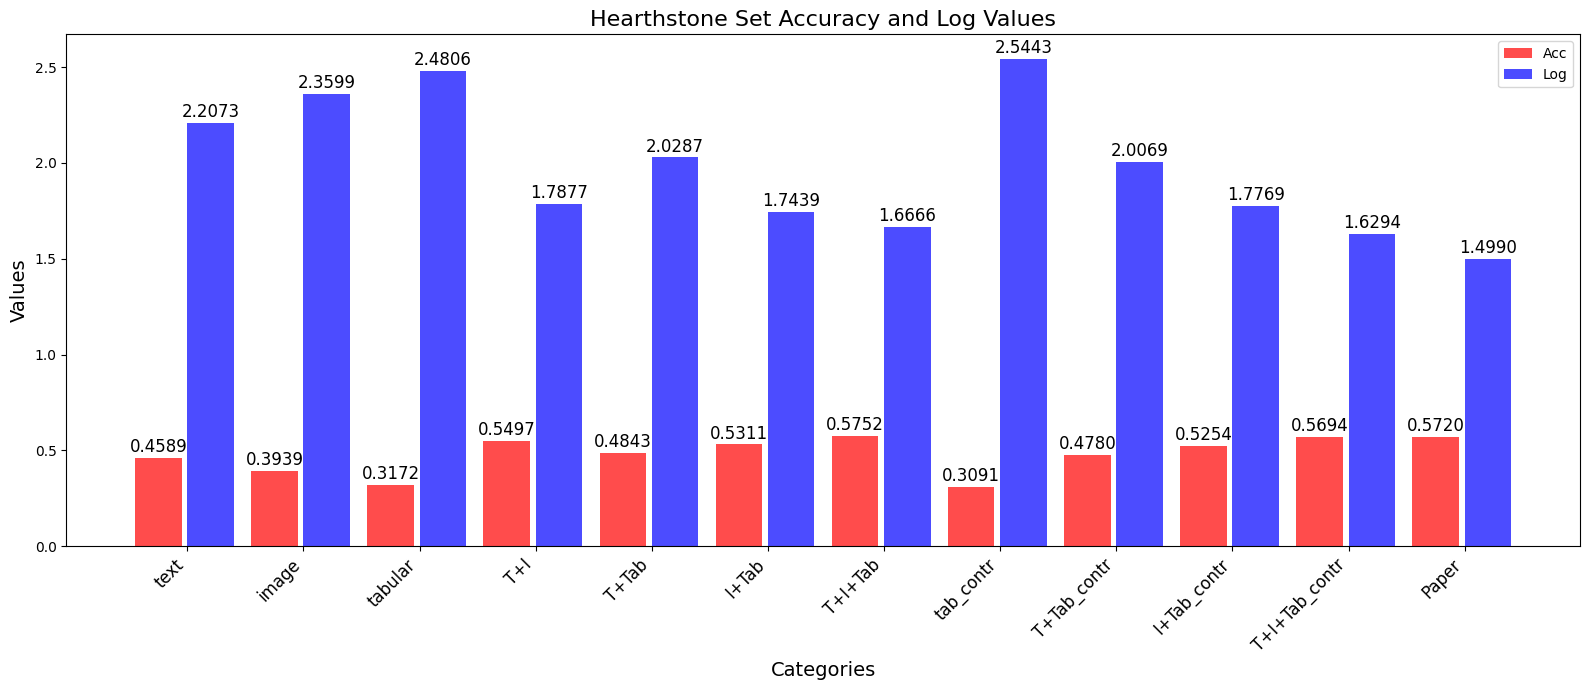

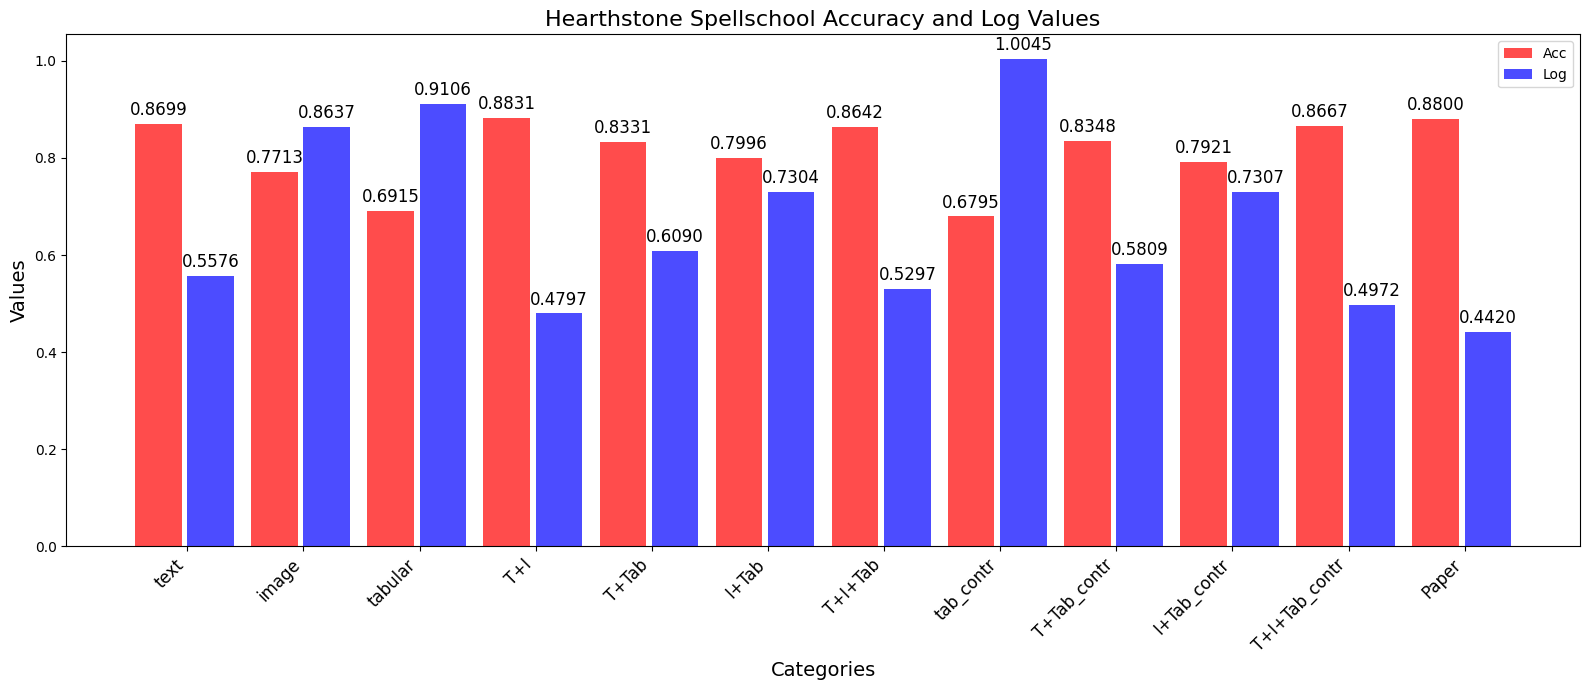

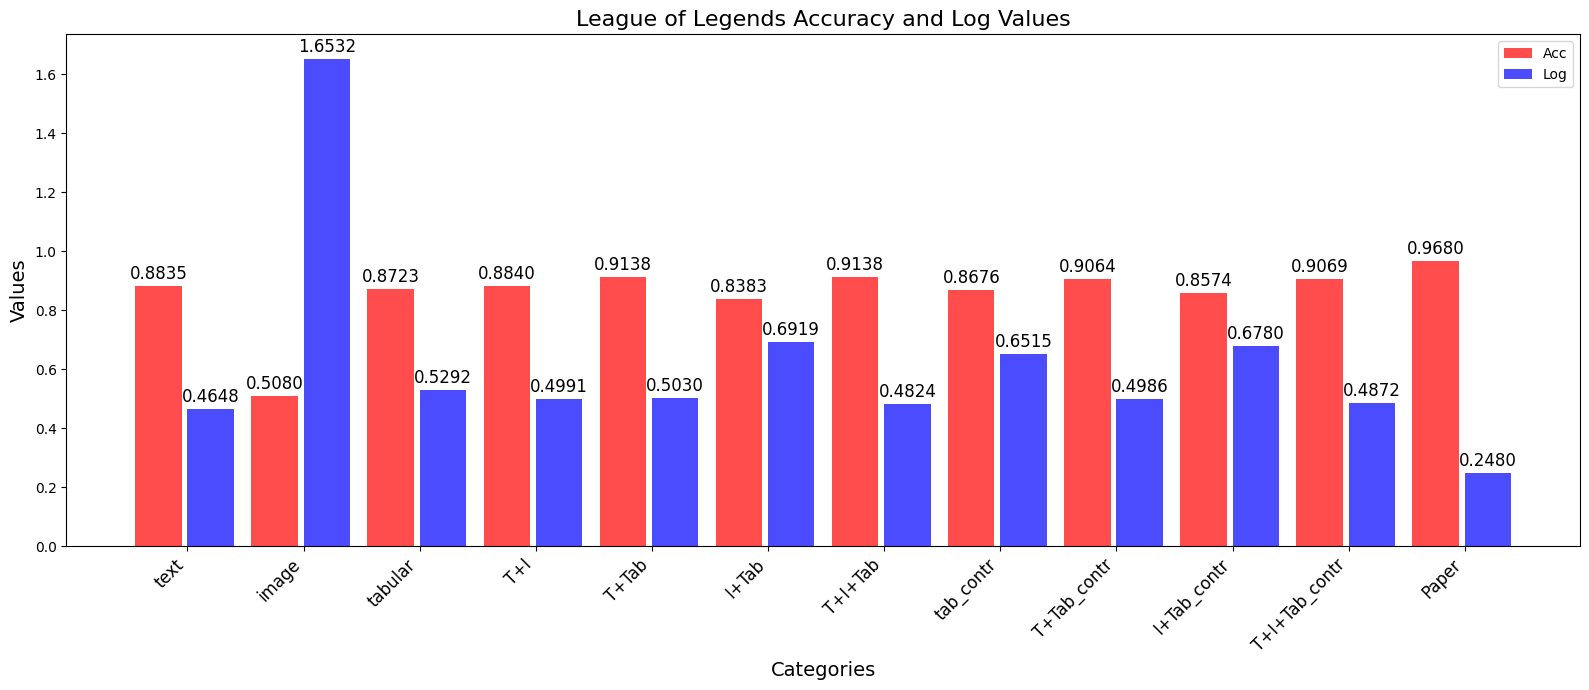

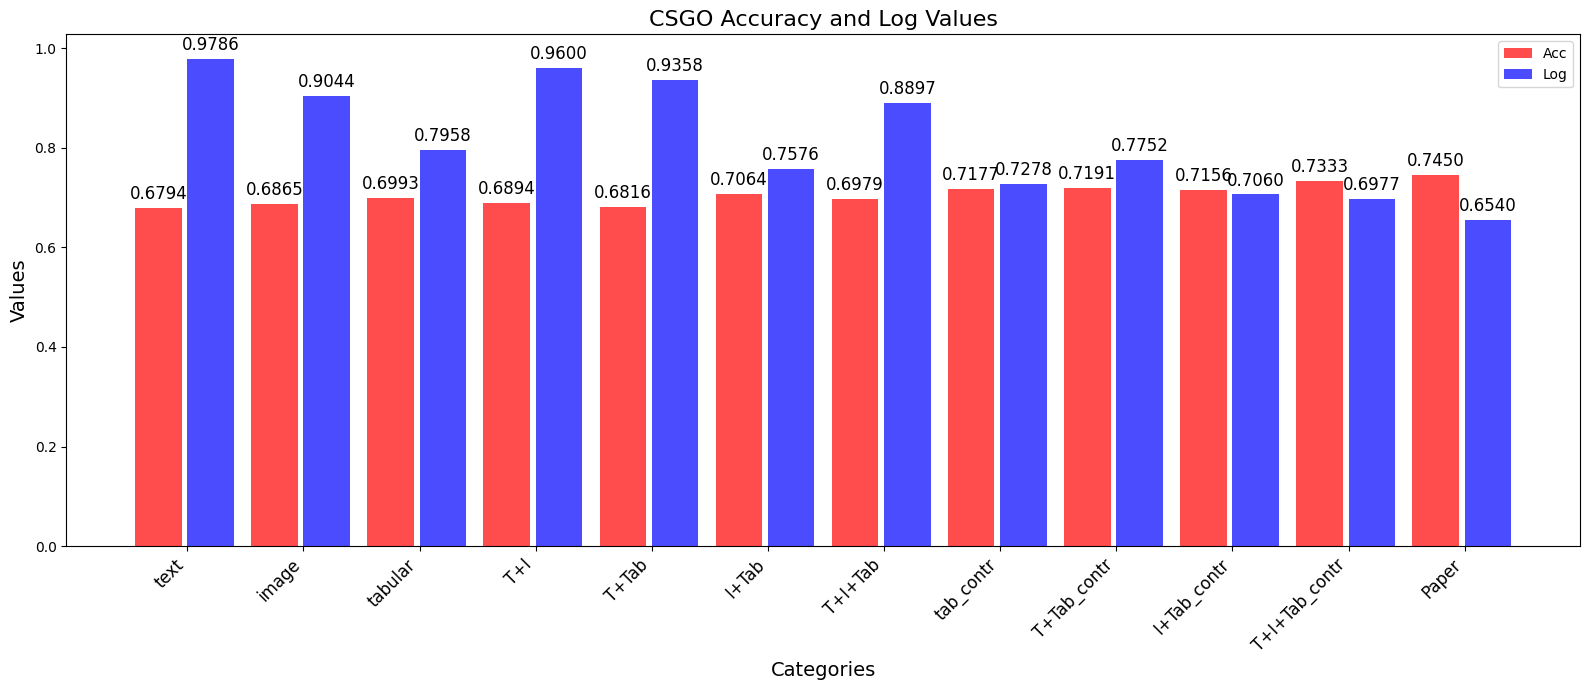

In [113]:
data = pd.read_excel("mug.ods", engine="odf")

datasets = ['Pokemon Type 1', 'Pokemon Type 2', 'Hearthstone Minion race', 'Hearhstone Cardclass', 'Hearthstone Set',
            'Hearthstone Spellschool', 'League of Legends', 'CSGO']

cols = data.columns

paper_acc = []

dataset_count = 0

custom_colors = ['red', 'blue']

for i in range(0, len(data), 2):
    values = data.iloc[i:i+2, :]
    acc = values.iloc[0, :].values
    log = values.iloc[1, :].values

    x = np.arange(len(cols))  # the label locations
    width = 0.4  # the width of the bars

    plt.figure(figsize=(16, 7))
    bars1 = plt.bar(x - width/2 - 0.05, acc, width, label='Acc', color=custom_colors[0], alpha=0.7)
    bars2 = plt.bar(x + width/2, log, width, label='Log', color=custom_colors[1], alpha=0.7)

    # Add text for labels, title and custom x-axis tick labels, etc.
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title(f'{datasets[dataset_count]} Accuracy and Log Values', fontsize=16)
    plt.xticks(x, cols, rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
    plt.legend()

    # Add labels on the bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom', fontsize=12, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

    dataset_count += 1

#### Peffinder Dataset
- The plot shows Accuracy in the left and Log loss in the right plot for unimodal and multimodal feature concatenation. The paper only states values for unimodal and all features together (https://aclanthology.org/2021.maiworkshop-1.5.pdf)
- T = Text, I = Image, Tab = Tabular

C:\Users\Felix\AppData\Local\Temp\ipykernel_10752\2545377450.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cols, rotation=45, ha='right')
C:\Users\Felix\AppData\Local\Temp\ipykernel_10752\2545377450.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(paper_cols, rotation=45, ha='right')


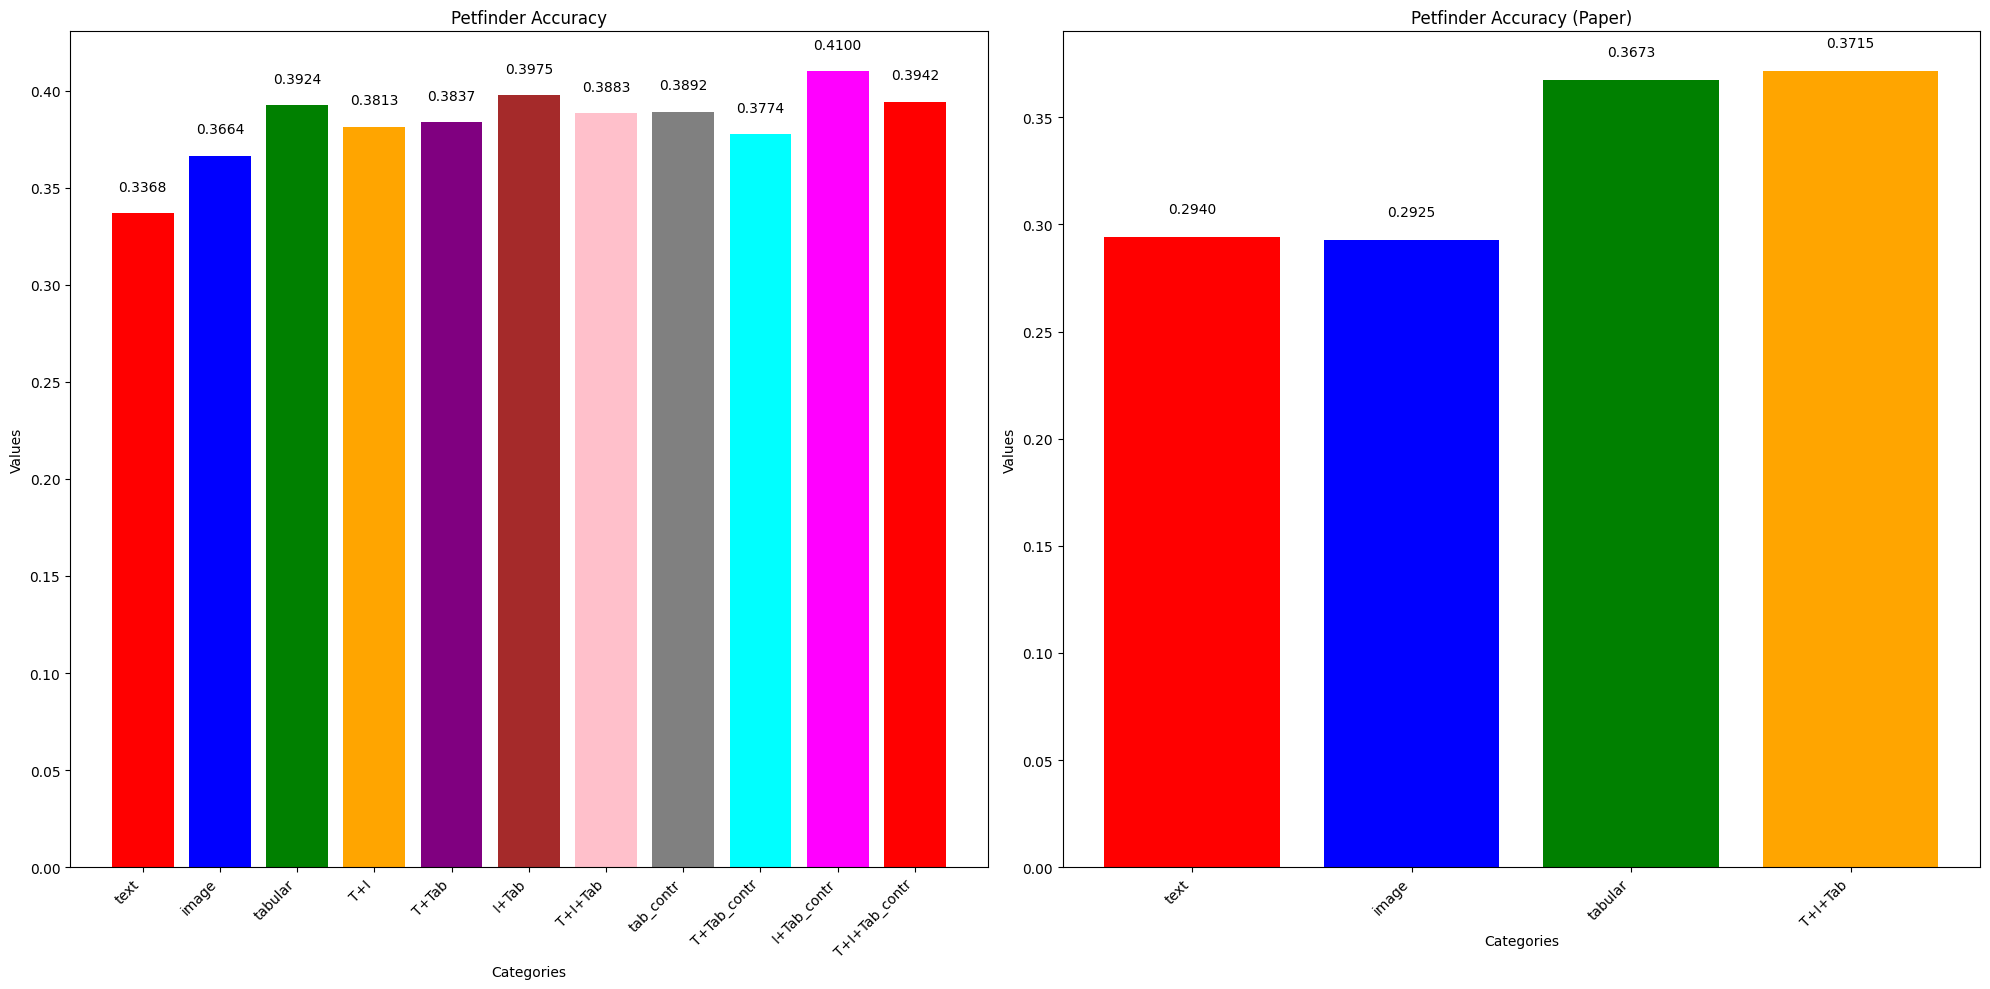

In [114]:
data = pd.read_excel("petfinder.ods", engine="odf")
custom_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
cols = data.columns
values = data.iloc[0, :]

paper_cols = ['text', 'image', 'tabular', 'T+I+Tab']
paper_acc = [0.294, 0.2925, 0.3673, 0.37152]


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot for dataset values
bars1 = ax1.bar(cols, values, color=custom_colors[:len(cols)])

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10, color='black')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Values')
ax1.set_title('Petfinder Accuracy')
ax1.set_xticklabels(cols, rotation=45, ha='right')

# Plot for paper accuracy values
bars2 = ax2.bar(paper_cols, paper_acc, color=custom_colors[:len(paper_cols)])

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10, color='black')

ax2.set_xlabel('Categories')
ax2.set_ylabel('Values')
ax2.set_title('Petfinder Accuracy (Paper)')
ax2.set_xticklabels(paper_cols, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### MulDIC (Multimodal Deep learning-based Issue Classification model)
- dataset consists of texts, images and codes. Paper only states values for Text, Text/Image, Text/Code and all together (https://www.mdpi.com/2076-3417/13/16/9456)
- The code is preprocessed following the methodology described in the paper: Comment removal, special token replacement (e.g. include \n or \t for code structure), case-folding, tokenization. Then processed using CNN to extract features
- T = Text, I = Image, C = Codes

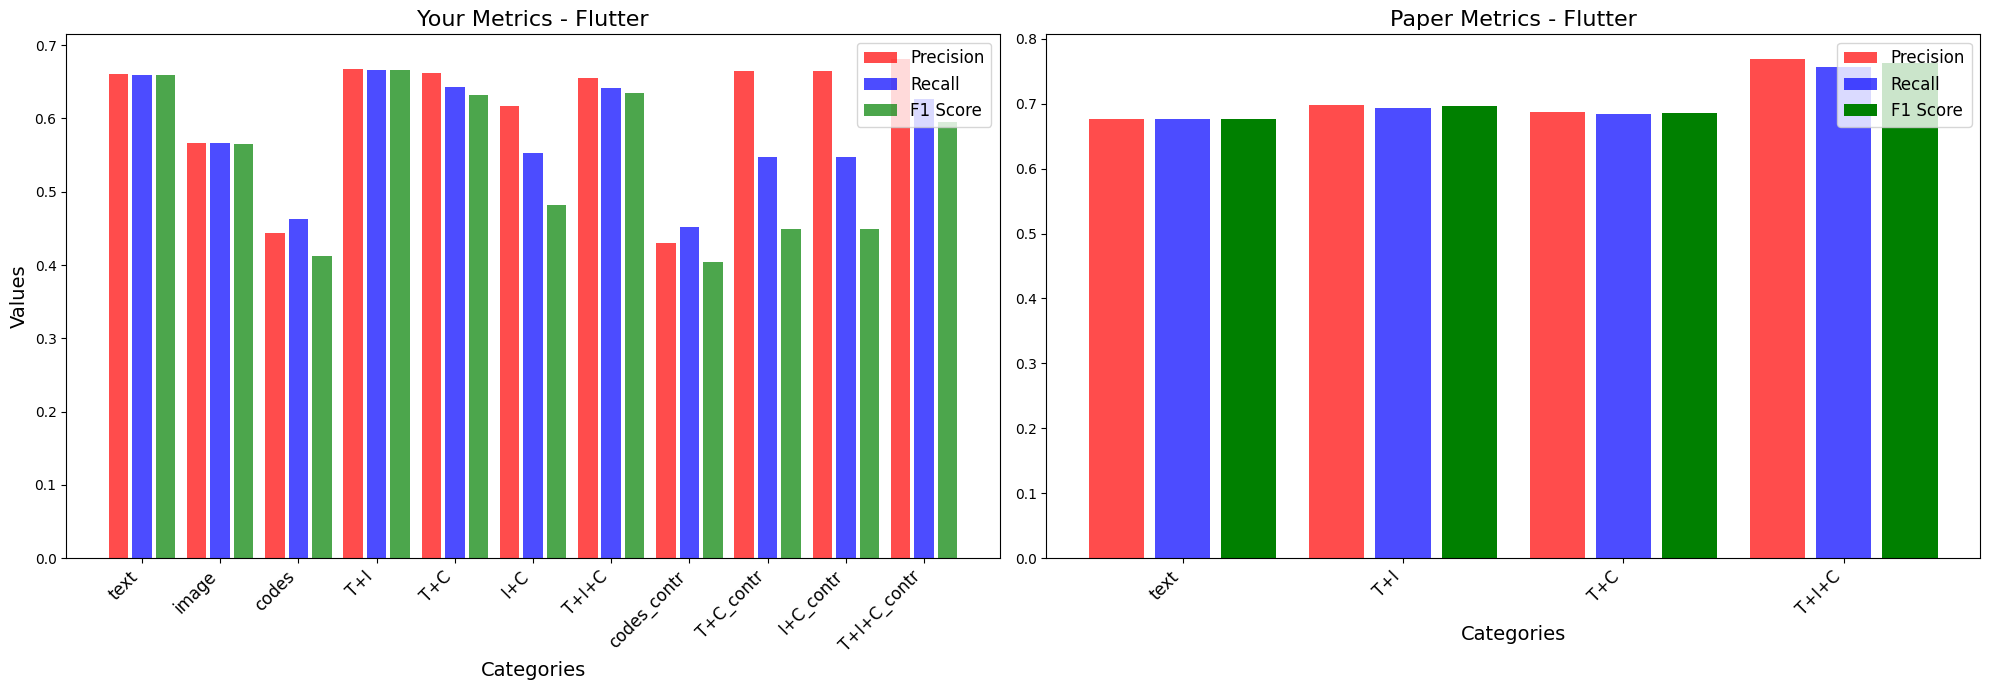

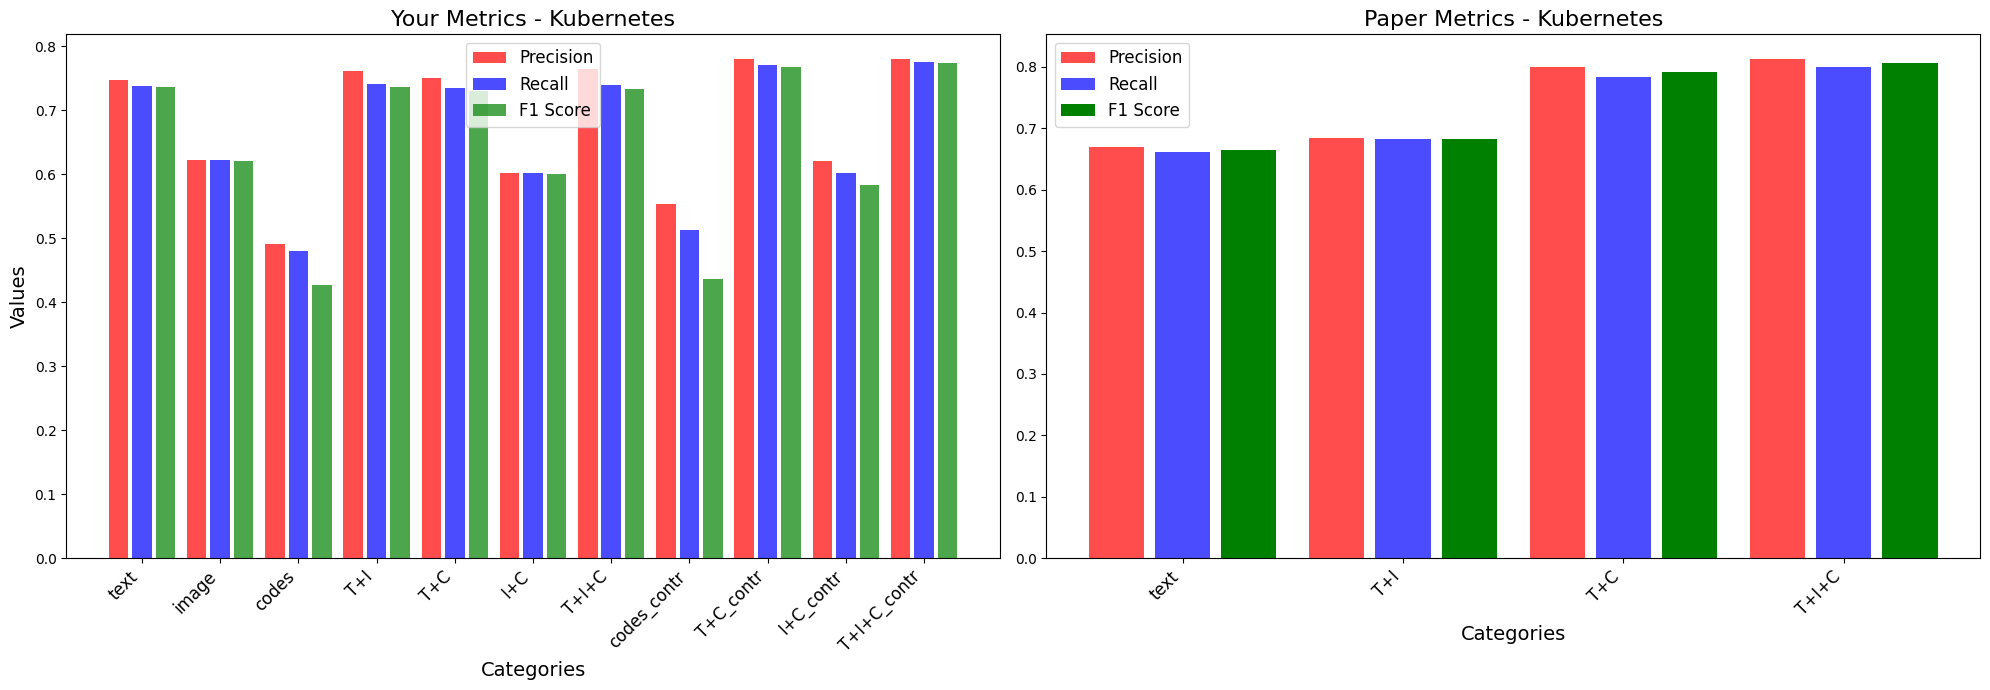

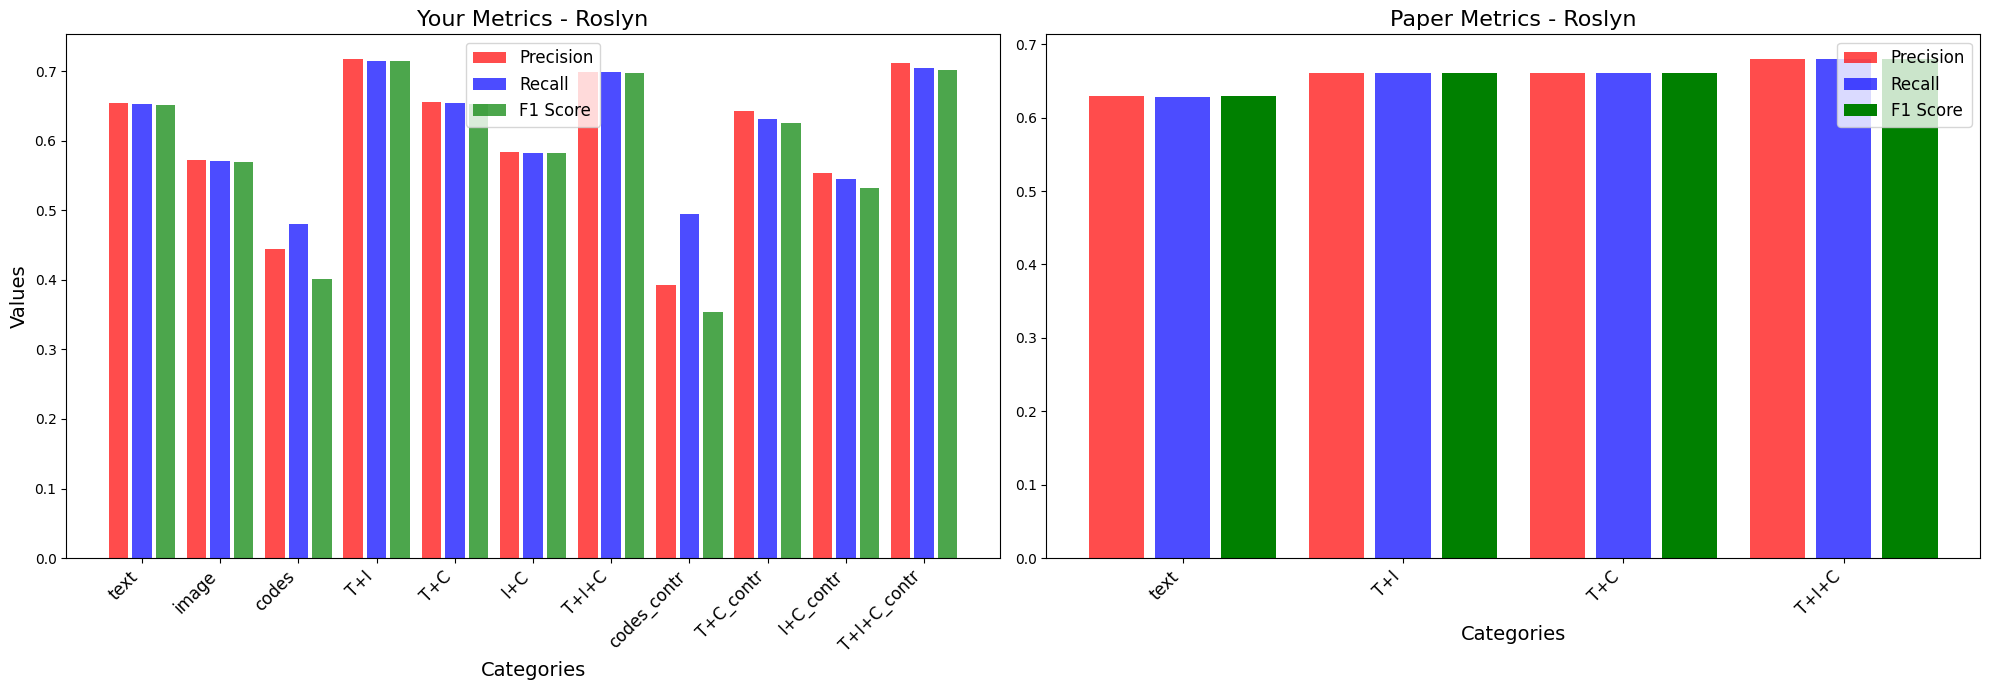

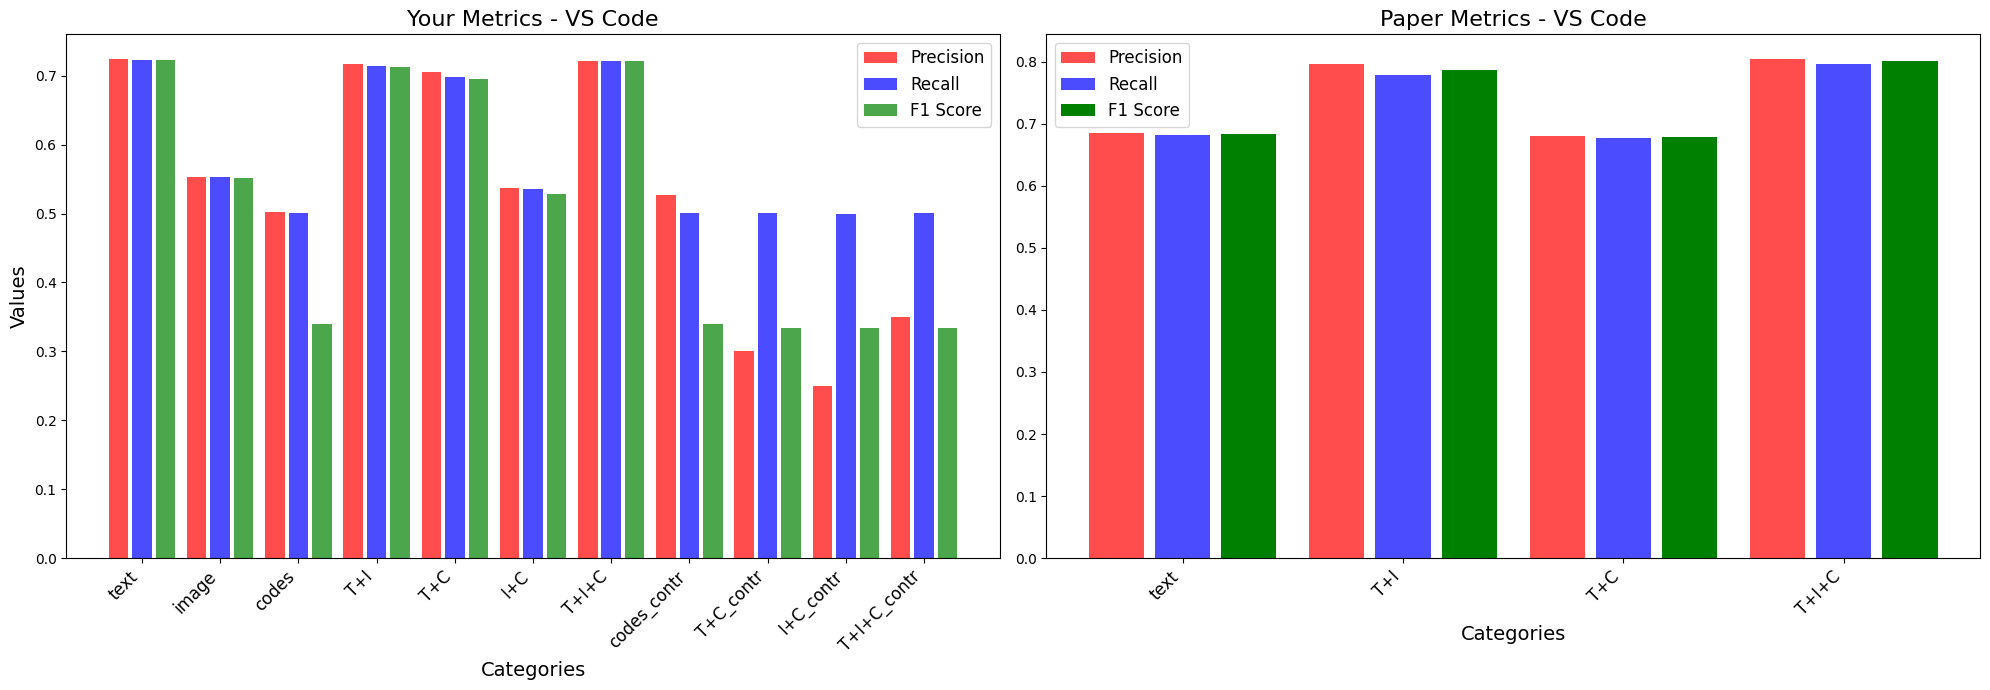

In [115]:
data = pd.read_excel("muldic.ods", engine="odf")
paper_data = pd.read_excel('muldic_paper.ods', engine='odf')

datasets = ['Flutter', 'Kubernetes', 'Roslyn', 'VS Code']
cols = data.columns
paper_cols = paper_data.columns

dataset_count = 0

custom_colors = ['red', 'blue', 'green']

for i in range(0, len(data), 3):
    # Extract your values
    values = data.iloc[i:i+3, :]
    prec = values.iloc[0, :].values
    rec = values.iloc[1, :].values
    f1 = values.iloc[2, :].values
    cols = values.columns
    
    # Extract paper values
    paper_values = paper_data.iloc[i:i+3, :]
    paper_prec = paper_values.iloc[0, :].values
    paper_rec = paper_values.iloc[1, :].values
    paper_f1 = paper_values.iloc[2, :].values
    paper_cols = paper_values.columns

    x = np.arange(len(cols))  # The label locations for your data
    paper_x = np.arange(len(paper_cols))  # The label locations for paper data
    width = 0.25  # Width of the bars

    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    # Plot your values
    axs[0].bar(x - width - 0.05, prec, width, label='Precision', color=custom_colors[0], alpha=0.7)
    axs[0].bar(x, rec, width, label='Recall', color=custom_colors[1], alpha=0.7)
    axs[0].bar(x + width + 0.05, f1, width, label='F1 Score', color=custom_colors[2], alpha=0.7)

    """# Add text for labels in your plot
    for bars in [axs[0].patches]:
        for bar in bars:
            height = bar.get_height()
            axs[0].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=8, color='black')"""

    axs[0].set_xlabel('Categories', fontsize=14)
    axs[0].set_ylabel('Values', fontsize=14)
    axs[0].set_title(f'Your Metrics - {datasets[dataset_count]}', fontsize=16)
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(cols, rotation=45, ha='right', fontsize=12)
    axs[0].legend(fontsize=12)

    # Plot paper values
    axs[1].bar(paper_x - width - 0.05, paper_prec, width, label='Precision', color=custom_colors[0], alpha=0.7)
    axs[1].bar(paper_x, paper_rec, width, label='Recall', color=custom_colors[1], alpha=0.7)
    axs[1].bar(paper_x + width + 0.05, paper_f1, width, label='F1 Score', color=custom_colors[2])

    """# Add text for labels in the paper plot
    for bars in [axs[1].patches]:
        for bar in bars:
            height = bar.get_height()
            axs[1].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=12, color='black')"""

    axs[1].set_xlabel('Categories', fontsize=14)
    axs[1].set_title(f'Paper Metrics - {datasets[dataset_count]}', fontsize=16)
    axs[1].set_xticks(paper_x)
    axs[1].set_xticklabels(paper_cols, rotation=45, ha='right', fontsize=12)
    axs[1].legend(fontsize=12)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    dataset_count += 1

#### Meld Dataset
- Dataset consists of two classification tasks: sentiment and emotion classification. Paper only state values for emotion classification (https://openaccess.thecvf.com/content/CVPR2022W/MULA/papers/Chudasama_M2FNet_Multi-Modal_Fusion_Network_for_Emotion_Recognition_in_Conversation_CVPRW_2022_paper.pdf)
- the dataset doesn't have images directly, only video files. From each video file 15 frames are extracted and then processed with clip, audio extracted with torchaudio
- T = Text, I = Image, A = Audio

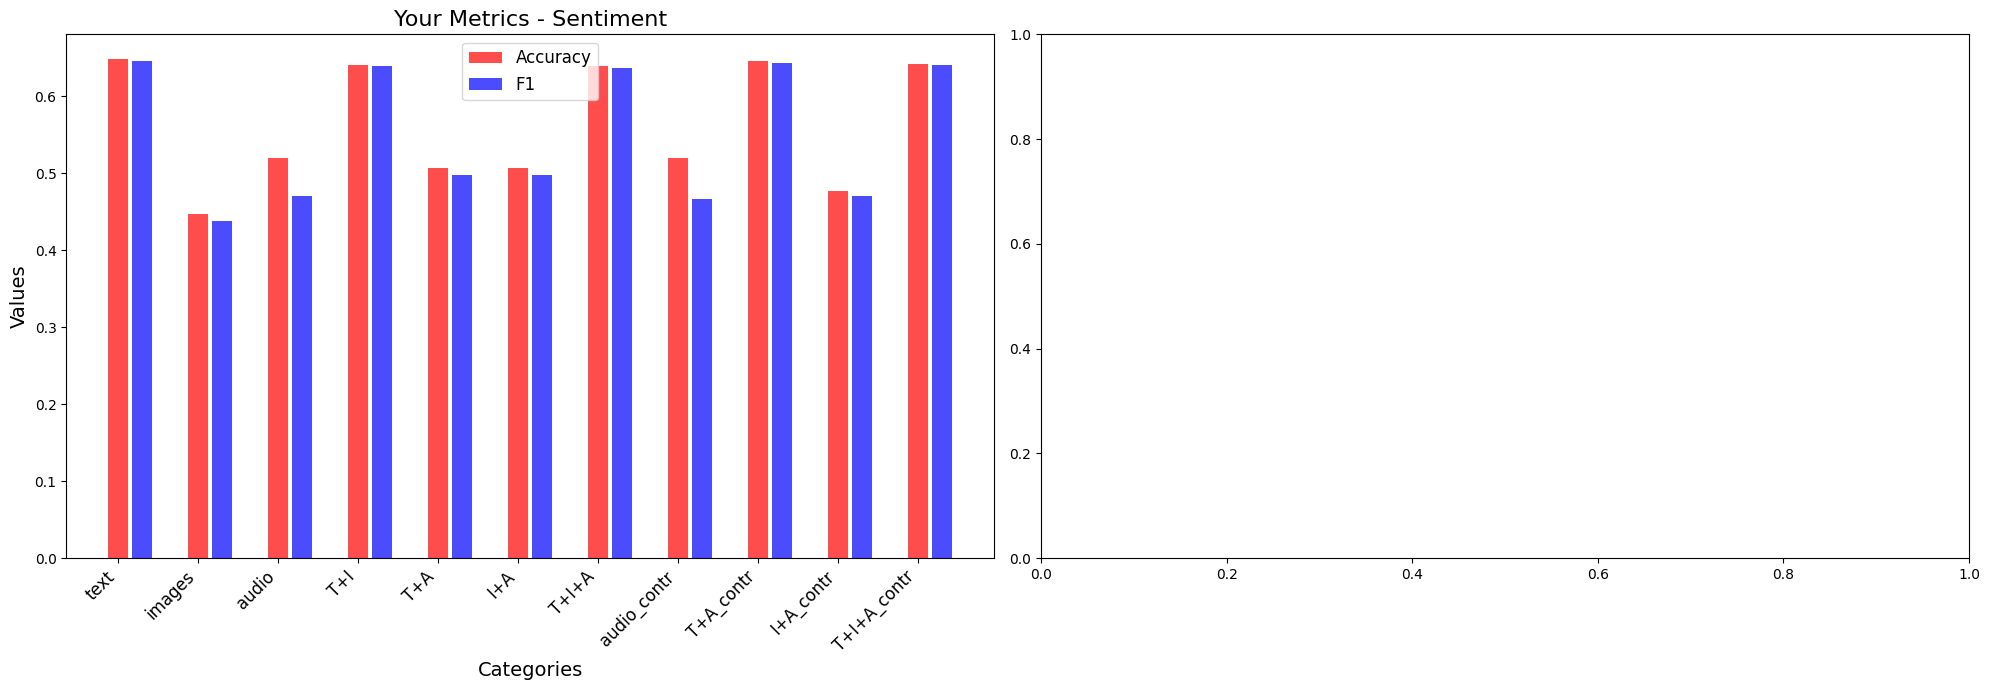

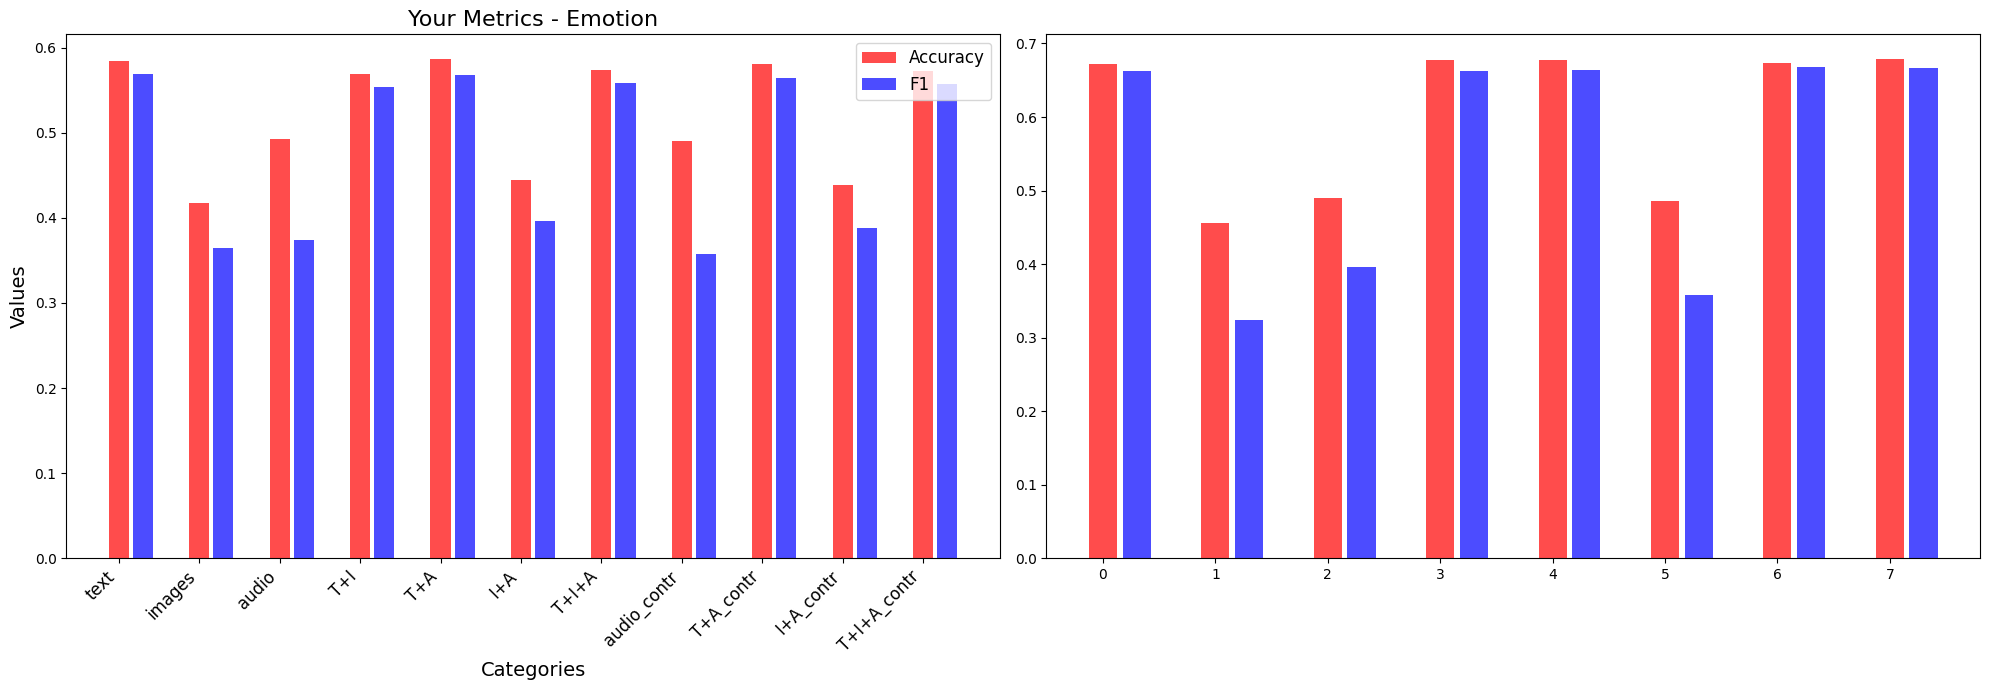

In [116]:
data = pd.read_excel("meld.ods", engine="odf")
paper_data = pd.read_excel('meld_paper.ods', engine='odf')

datasets = ['Sentiment', 'Emotion']

dataset_count = 0

custom_colors = ['red', 'blue']

for i in range(0, len(data), 2):
    # Extract your values
    values = data.iloc[i:i+2, :]
    acc = values.iloc[0, :].values
    f1 = values.iloc[1, :].values
    cols = values.columns
    

    if dataset_count > 0:
        # Extract paper values
        paper_values = paper_data.iloc[:2, :]
        paper_acc = paper_values.iloc[0, :].values
        paper_f1 = paper_values.iloc[1, :].values
        paper_cols = paper_values.columns

    x = np.arange(len(cols))  # The label locations for your data
    paper_x = np.arange(len(paper_cols))  # The label locations for paper data
    width = 0.25  # Width of the bars

    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    # Plot your values
    axs[0].bar(x, acc, width, label='Accuracy', color=custom_colors[0], alpha=0.7)
    axs[0].bar(x + width + 0.05, f1, width, label='F1', color=custom_colors[1], alpha=0.7)

    """# Add text for labels in your plot
    for bars in [axs[0].patches]:
        for bar in bars:
            height = bar.get_height()
            axs[0].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=8, color='black')"""

    axs[0].set_xlabel('Categories', fontsize=14)
    axs[0].set_ylabel('Values', fontsize=14)
    axs[0].set_title(f'Your Metrics - {datasets[dataset_count]}', fontsize=16)
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(cols, rotation=45, ha='right', fontsize=12)
    axs[0].legend(fontsize=12)

    if dataset_count > 0:
        # Plot paper values
        axs[1].bar(paper_x, paper_acc, width, label='Accuracy', color=custom_colors[0], alpha=0.7)
        axs[1].bar(paper_x + width + 0.05, paper_f1, width, label='F1 Score', color=custom_colors[1], alpha=0.7)

        """# Add text for labels in the paper plot
        for bars in [axs[1].patches]:
            for bar in bars:
                height = bar.get_height()
                axs[1].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                            f'{height:.3f}', ha='center', va='bottom', fontsize=12, color='black')

        axs[1].set_xlabel('Categories', fontsize=14)
        axs[1].set_title(f'Paper Metrics - {datasets[dataset_count]}', fontsize=16)
        axs[1].set_xticks(paper_x)
        axs[1].set_xticklabels(paper_cols, rotation=45, ha='right', fontsize=12)
        axs[1].legend(fontsize=12)"""

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    dataset_count += 1

#### MMIS
- dataset consists of texts, images, and audio files. Audiofeatures extracted using torchaudio, classification task is to classify rooms
- paper is quite new and only states values for accuracy of images with different models. But since this dataset consists of three modalities I wanted to see how the unimodalities and multimodalities perform in this dataset (https://arxiv.org/pdf/2407.05980)
- T = Text, I = Image, A = Audio

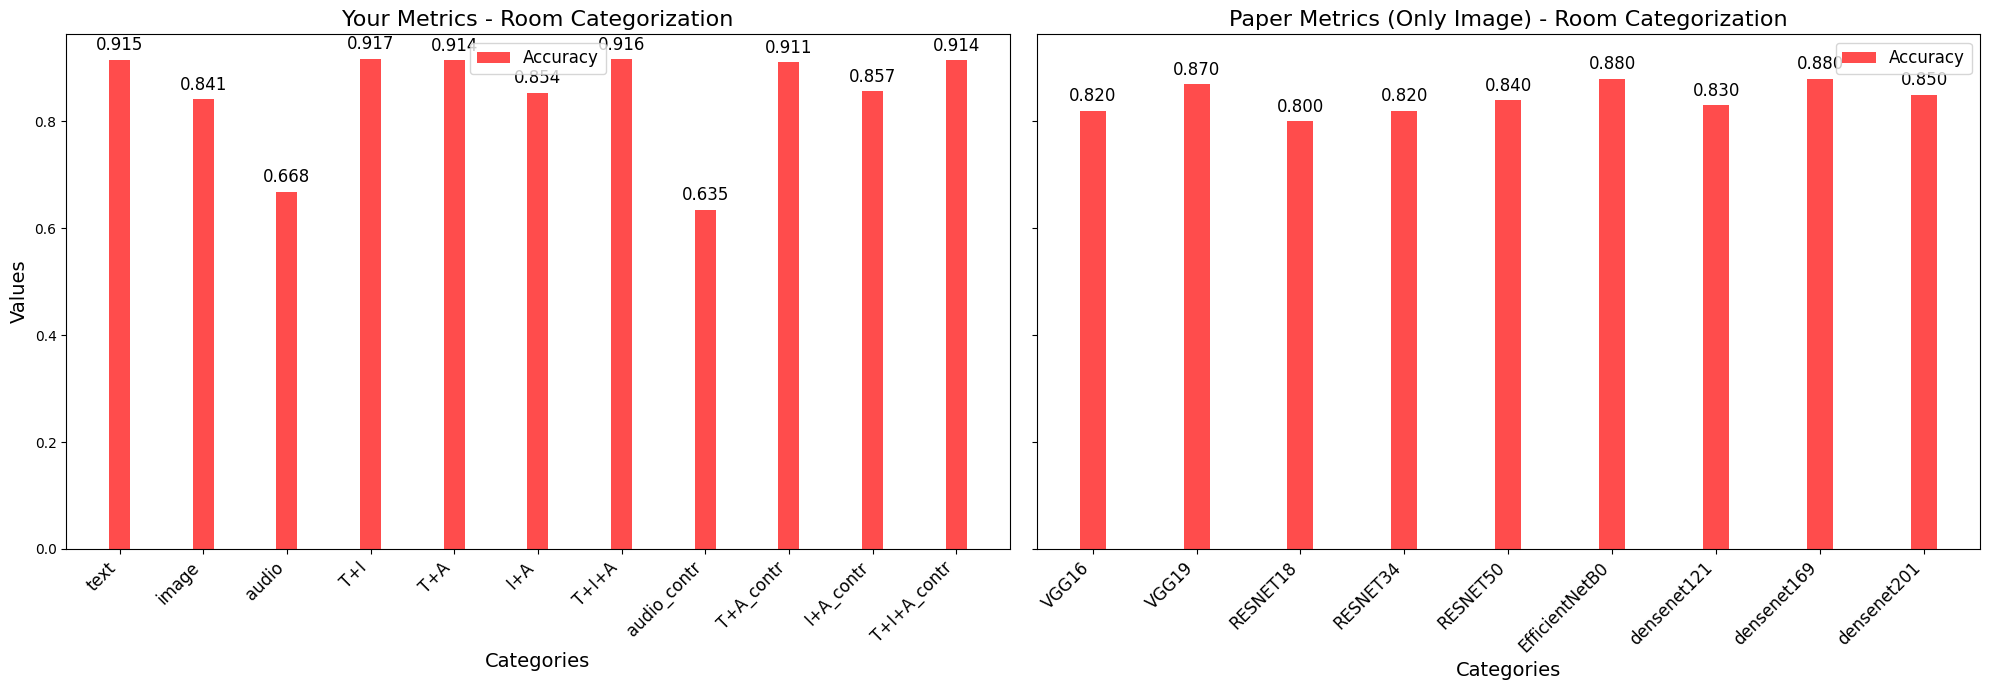

In [117]:
data = pd.read_excel("mmis.ods", engine="odf")
paper_data = pd.read_excel('mmis_paper.ods', engine='odf')

datasets = ['Room Categorization']

dataset_count = 0

custom_colors = ['red']


# Extract your values
values = data.iloc[:1, :]
acc = values.iloc[0, :].values
cols = values.columns


# Extract paper values
paper_values = paper_data.iloc[:1, :]
paper_acc = paper_values.iloc[0, :].values
paper_cols = paper_values.columns

x = np.arange(len(cols))  # The label locations for your data
paper_x = np.arange(len(paper_cols))  # The label locations for paper data

fig, axs = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

# Plot your values
axs[0].bar(x, acc, width, label='Accuracy', color=custom_colors[0], alpha=0.7)

# Add text for labels in your plot
for bars in [axs[0].patches]:
    for bar in bars:
        height = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=12, color='black')

axs[0].set_xlabel('Categories', fontsize=14)
axs[0].set_ylabel('Values', fontsize=14)
axs[0].set_title(f'Your Metrics - {datasets[dataset_count]}', fontsize=16)
axs[0].set_xticks(x)
axs[0].set_xticklabels(cols, rotation=45, ha='right', fontsize=12)
axs[0].legend(fontsize=12)

# Plot paper values
axs[1].bar(paper_x, paper_acc, width, label='Accuracy', color=custom_colors[0], alpha=0.7)

# Add text for labels in the paper plot
for bars in [axs[1].patches]:
    for bar in bars:
        height = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=12, color='black')

axs[1].set_xlabel('Categories', fontsize=14)
axs[1].set_title(f'Paper Metrics (Only Image) - {datasets[dataset_count]}', fontsize=16)
axs[1].set_xticks(paper_x)
axs[1].set_xticklabels(paper_cols, rotation=45, ha='right', fontsize=12)
axs[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

dataset_count += 1